In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# read the image
image = cv2.imread("Test3.png")
image = cv2.bilateralFilter(image,10,100,100)
#image = cv2.Canny(image,100,200)
#ret, image = cv2.threshold(image, 45, 255, cv2.THRESH_BINARY_INV)

In [118]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [119]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [120]:
print(pixel_values.shape)


(69540, 3)


In [121]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [122]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [123]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [124]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

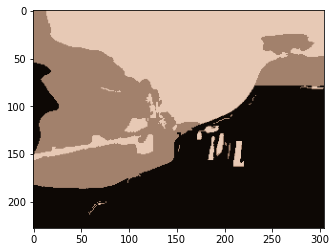

In [125]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

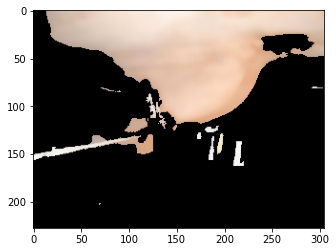

In [127]:
# disable the cluster's number 0,1 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster1 = 0
cluster2 = 1
masked_image[labels == cluster1] = [0, 0, 0]
masked_image[labels == cluster2] = [0, 0, 0]

# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

In [ ]:
import pandas as pd 
import numpy as np 
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import cv2 

#read in image
img = cv2.imread('027.png',1)
row,col = img.shape[:2]
print(row , col)

#get a unique pixel ID for each pixel

pixel = ['pixel-' + str(i) for i in range(0,row*col)]
bBand = ['bBand']
gBand = ['gBand']
rBand = ['rBand']
data = pd.DataFrame(columns=[bBand,gBand,rBand],index = pixel)

#populate data for each band
b,g,r = cv2.split(img)

#each index value
indexCount = row*col
for index in range(indexCount):
    i = int(index/row)
    j = index%row
    data.loc[pixel,'bBand'] = b[i,j]
    data.loc[pixel,'gBand'] = g[i,j]
    data.loc[pixel,'rBand'] = r[i,j]

print(data.head())

480 586


(480, 586, 4)


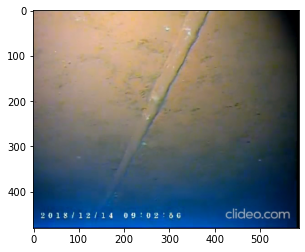

In [1]:
#Importing libraries.
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
#Reading an image and printing the shape of the image. 
img = mplib.imread('027.png')
print(img.shape)
plt.imshow(img)

In [6]:
#Reshaping the image to 2-dimensional so we are multiplying columns with depth so 225 X 3 = 675.

img_r = np.reshape(img,(220,360)) 

print(img_r.shape) 


#Applying PCA so that it will compress the image, the reduced dimension is shown in the output. 

pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

#Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (225,225 ,3)) 
print(temp.shape) 
plt.imshow(temp)

ValueError: cannot reshape array of size 1125120 into shape (220,360)